In [1]:
import os
from PIL import Image
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

class DeepFashion(Dataset):
    '''
    DeepFashion dataset class
    img_dir : directory of image files
    ann_dir : directory of annotation
    transform : how to transform images, should be from torchvision.transforms
    '''
    def __init__(self, data_dir, ann_dir, transform=None):
        self.data_dir = data_dir
        self.imdir = []
        self.ann = []
        self.anndir = os.path.join(self.data_dir, ann_dir)
        self.transform = transform
        with open(self.anndir, 'r') as ann:
            for i, line in enumerate(ann):
                if i == 0:
                    self.len = int(line.rstrip('\n'))
                elif i > 1:
                    imdir, ann = line.rstrip('\n').split(maxsplit=1)
                    self.imdir.append(os.path.join(self.data_dir, imdir))
                    ann_np = np.array([int(i) for i in ann.split()])
                    ann_np[ann_np == -1] = 0
                    self.ann.append(ann_np)
        print('completed dataset loading')

    def __len__(self):
        return self.len

    def __getitem__(self, idx):
        impath = self.imdir[idx]
        img = Image.open(impath)
        ann = self.ann[idx]
        
        if self.transform:
            img = self.transform(img)

        sample = {'image': img, 'attributes': ann}

        return sample

In [2]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [3]:
dataset = DeepFashion('../../../local/DeepFashion/', 'ann/list_attr_img.txt',
                      transform=transform)

completed dataset loading


In [4]:
import matplotlib.pyplot as plt
for i in range(10):
    sample = dataset[i]
    img = sample['image'].numpy().transpose((1, 2, 0))
    plt.figure()
    plt.imshow(img)

In [5]:
def collate_fn(data):
    """
    converts list of samples to a batch.
    sample : {'image': (250, 250, 3), 'attributes': (1000,)}
    """
    image = np.stack([sample['image'] for sample in data], 0)
    attributes = np.array([sample['attributes'] for sample in data])
    return {'image': image, 'attributes': attributes}

In [6]:
dataloader = DataLoader(dataset, batch_size=10, shuffle=True, collate_fn=collate_fn)
for i, data in enumerate(dataloader):
    print(data['image'].shape, data['attributes'].shape)
    if (i == 0):
          break

(10, 3, 224, 224) (10, 1000)


In [7]:
import pandas as pd
df = pd.read_csv('../../../local/CelebA/list_attr_celeba.csv')
df

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
5,000006.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,1,-1,1,-1,-1,1
6,000007.jpg,1,-1,1,1,-1,-1,1,1,1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,1
7,000008.jpg,1,1,-1,1,-1,-1,1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
8,000009.jpg,-1,1,1,-1,-1,1,1,-1,-1,...,-1,1,-1,-1,1,-1,1,-1,-1,1
9,000010.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,1,-1,-1,1


In [8]:
attnames = {}
for i, attname in enumerate(df.columns, -1):
    attnames[i] = attname
attnames

{-1: 'image_id',
 0: '5_o_Clock_Shadow',
 1: 'Arched_Eyebrows',
 2: 'Attractive',
 3: 'Bags_Under_Eyes',
 4: 'Bald',
 5: 'Bangs',
 6: 'Big_Lips',
 7: 'Big_Nose',
 8: 'Black_Hair',
 9: 'Blond_Hair',
 10: 'Blurry',
 11: 'Brown_Hair',
 12: 'Bushy_Eyebrows',
 13: 'Chubby',
 14: 'Double_Chin',
 15: 'Eyeglasses',
 16: 'Goatee',
 17: 'Gray_Hair',
 18: 'Heavy_Makeup',
 19: 'High_Cheekbones',
 20: 'Male',
 21: 'Mouth_Slightly_Open',
 22: 'Mustache',
 23: 'Narrow_Eyes',
 24: 'No_Beard',
 25: 'Oval_Face',
 26: 'Pale_Skin',
 27: 'Pointy_Nose',
 28: 'Receding_Hairline',
 29: 'Rosy_Cheeks',
 30: 'Sideburns',
 31: 'Smiling',
 32: 'Straight_Hair',
 33: 'Wavy_Hair',
 34: 'Wearing_Earrings',
 35: 'Wearing_Hat',
 36: 'Wearing_Lipstick',
 37: 'Wearing_Necklace',
 38: 'Wearing_Necktie',
 39: 'Young'}

In [9]:
df = df.replace(-1, 0)
df

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,0,1,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
1,000002.jpg,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,000003.jpg,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,000004.jpg,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
4,000005.jpg,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
5,000006.jpg,0,1,1,0,0,0,1,0,0,...,0,0,0,1,1,0,1,0,0,1
6,000007.jpg,1,0,1,1,0,0,1,1,1,...,0,0,1,0,0,0,0,0,0,1
7,000008.jpg,1,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
8,000009.jpg,0,1,1,0,0,1,1,0,0,...,0,1,0,0,1,0,1,0,0,1
9,000010.jpg,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [10]:
len(df)

202599

In [11]:
df.iloc[len(df) // 5 * 4:]

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
162076,162077.jpg,0,0,0,0,0,1,0,0,1,...,0,1,0,1,1,0,1,0,0,0
162077,162078.jpg,0,1,1,0,0,0,1,0,0,...,0,0,0,0,1,0,1,1,0,1
162078,162079.jpg,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
162079,162080.jpg,1,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
162080,162081.jpg,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
162081,162082.jpg,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1
162082,162083.jpg,0,0,0,1,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,1
162083,162084.jpg,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
162084,162085.jpg,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
162085,162086.jpg,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
df.iloc[0]

image_id               000001.jpg
5_o_Clock_Shadow                0
Arched_Eyebrows                 1
Attractive                      1
Bags_Under_Eyes                 0
Bald                            0
Bangs                           0
Big_Lips                        0
Big_Nose                        0
Black_Hair                      0
Blond_Hair                      0
Blurry                          0
Brown_Hair                      1
Bushy_Eyebrows                  0
Chubby                          0
Double_Chin                     0
Eyeglasses                      0
Goatee                          0
Gray_Hair                       0
Heavy_Makeup                    1
High_Cheekbones                 1
Male                            0
Mouth_Slightly_Open             1
Mustache                        0
Narrow_Eyes                     0
No_Beard                        1
Oval_Face                       0
Pale_Skin                       0
Pointy_Nose                     1
Receding_Hairl

In [13]:
df.iloc[0, 1:].values.astype(int)

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1])

In [25]:
from model import AttrEncoder
import matplotlib.pyplot as plt

path = "../out/epoch_2.model"
model = AttrEncoder().to(torch.device('cuda:1'))
model.load_state_dict(torch.load(path))
e = model.eval()

In [104]:
idx = np.random.randint(len(df))
path = df.iloc[idx, 0]
att = df.iloc[idx, 1:]
impath = "../../../local/CelebA/img_align_celeba/"
im = Image.open(os.path.join(impath, path), 'r')
imarr = transform(im)
im_showstyle = imarr.numpy().transpose((1, 2, 0))
print(im_showstyle.shape)


(224, 224, 3)


In [105]:
inp = torch.Tensor(imarr).to(torch.device('cuda:1'))
print(inp.size())
out = model(inp).detach().cpu()
out = out[0]
out[out >= 0.5] = 1
out[out < 0.5] = 0
out = out.tolist()

torch.Size([3, 224, 224])


In [106]:
atts = [attnames[i] for i, val in enumerate(out) if val == 1]
for j in atts:
    print(j)

Arched_Eyebrows
Attractive
Black_Hair
Heavy_Makeup
High_Cheekbones
Mouth_Slightly_Open
No_Beard
Oval_Face
Smiling
Wearing_Earrings
Wearing_Lipstick
Young


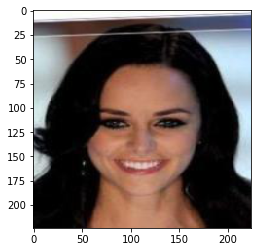

In [107]:
plt.imshow(im_showstyle)
plt.show()